## Problem 1: Heart Disease Prediction

### Background
Heart disease is a major global health issue, and early detection is crucial for preventive care. A predictive model was developed and validated to detect heart disease, with metrics calculated to assess its performance.


## Question 1a: Confusion Matrix and Performance Metrics

### Constructing the Confusion Matrix

|                   | Predicted Positive | Predicted Negative |
|-------------------|--------------------|--------------------|
| **Actual Positive** | 1200               | 500                |
| **Actual Negative** | 300                | 1000               |


#### Metrics Calculation


In [7]:
# Defining metrics
TP = 1200  # True Positives
TN = 1000  # True Negatives
FP = 300   # False Positives
FN = 500   # False Negatives
total_predictions = 3000

# Calculating metrics
error_rate = (FP + FN) / total_predictions
sensitivity = TP / (TP + FN)  # Recall or True Positive Rate
specificity = TN / (TN + FP)  # True Negative Rate
accuracy = (TP + TN) / total_predictions

# Displaying results
print(f"Error Rate: {error_rate:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Accuracy: {accuracy:.3f}")


Error Rate: 0.267
Sensitivity (Recall): 0.706
Specificity: 0.769
Accuracy: 0.733


### Output Explanation

When analyzing the model's performance, we calculated the following metrics to evaluate its effectiveness:

- **Error Rate**:  
  This metric represents the proportion of incorrect predictions out of all predictions made by the model. In simpler terms, it tells us how often the model was wrong.  
  **Value**: 0.267 (26.7%)  
  This means approximately 26.7% of the predictions were incorrect.

- **Sensitivity (Recall)**:  
  Sensitivity, also known as recall, measures the model's ability to identify true positive cases — in this context, patients with heart disease. A higher sensitivity indicates fewer false negatives, which is crucial given the hospital's goal of minimizing undiagnosed heart disease cases.  
  **Value**: 0.706 (70.6%)  
  The model correctly identifies 70.6% of all actual heart disease cases.

- **Specificity**:  
  This metric evaluates the model's ability to correctly classify true negatives — patients who are healthy. High specificity reduces false positives, ensuring healthy individuals are not wrongly diagnosed with heart disease.  
  **Value**: 0.769 (76.9%)  
  The model correctly classifies 76.9% of all actual healthy patients.

- **Accuracy**:  
  Accuracy represents the overall performance of the model, showing the proportion of all correct predictions (both true positives and true negatives) out of the total predictions. It provides a general measure of how well the model is performing.  
  **Value**: 0.733 (73.3%)  
  The model's predictions were correct 73.3% of the time.

### Summary 
The model shows decent performance, with an overall accuracy of 73.3%. While its ability to detect heart disease cases (sensitivity of 70.6%) is acceptable, there is room for improvement, especially given the hospital's priority of minimizing false negatives. The specificity of 76.9% ensures healthy individuals are mostly classified correctly, but increasing sensitivity further would better align with the hospital’s objectives.


### Question 1b: Threshold Analysis

The model generates probability scores for predicting heart disease, and different thresholds influence the trade-off between sensitivity and specificity. Below is a detailed analysis of the thresholds **0.3**, **0.5**, and **0.7**:

1. **Threshold: 0.3**  
   - **Effect**:  
     Lowering the threshold increases the model's sensitivity (recall), ensuring that a higher number of true positive cases (patients with heart disease) are correctly identified. This approach significantly reduces false negatives.  
   - **Trade-off**:  
     While sensitivity improves, specificity decreases. This means a higher number of healthy patients may be misclassified as having heart disease, leading to an increase in false positives.  
   - **Alignment with Hospital Goals**:  
     This threshold aligns well with the hospital's priority of minimizing false negatives, as undiagnosed cases pose a high risk.

2. **Threshold: 0.5**  
   - **Effect**:  
     This threshold represents a balanced trade-off between sensitivity and specificity. It does not strongly favor minimizing false negatives or false positives, but rather aims to achieve moderate performance in both areas.  
   - **Suitability**:  
     While balanced, it may not fully satisfy the hospital's priority to minimize false negatives, as some cases of heart disease could still go undetected.

3. **Threshold: 0.7**  
   - **Effect**:  
     Increasing the threshold improves specificity, ensuring that most healthy patients are correctly identified. This reduces the number of false positives.  
   - **Trade-off**:  
     Sensitivity decreases significantly, leading to a higher number of patients with heart disease being misclassified as healthy (false negatives).  
   - **Alignment with Hospital Goals**:  
     This threshold does not align with the hospital’s goals, as it increases the risk of undetected heart disease cases, which could have serious consequences.

### Recommendation
The optimal threshold for this scenario is **0.3**. This threshold prioritizes sensitivity, allowing the model to correctly identify the maximum number of heart disease cases. While it may result in an increase in false positives, this trade-off is acceptable. Early detection of heart disease is crucial, and the potential consequences of undiagnosed cases (false negatives) far outweigh the cost and inconvenience of additional testing for healthy individuals. By adopting a lower threshold, the hospital can ensure better preventive care and minimize high-risk undetected cases.


### Question 1c: Model Improvement

To address the hospital's priority of minimizing false negatives (undiagnosed heart disease cases), the following methods can be implemented to improve the model's sensitivity:

1. **Adjust the Decision Threshold**  
   - **Approach**:  
     Lower the decision threshold from the default value (e.g., 0.5) to a more sensitive value such as **0.3**. This ensures that the model classifies more patients as having heart disease, thereby reducing false negatives.  
   - **Impact**:  
     Although this may increase false positives (healthy individuals classified as having heart disease), it significantly reduces the risk of undetected cases. This trade-off is acceptable given the hospital's priority.  

2. **Cost-Sensitive Learning**  
   - **Approach**:  
     Integrate a cost-sensitive learning mechanism during model training that assigns a higher penalty to false negatives than false positives. For instance, adjusting the loss function to prioritize minimizing false negatives.  
   - **Impact**:  
     The model focuses more on correctly identifying heart disease cases, effectively improving sensitivity and reducing false negatives.  

3. **Resampling Techniques**  
   - **Approach**:  
     Apply **Synthetic Minority Oversampling Technique (SMOTE)** or similar methods to balance the dataset by oversampling the minority class (heart disease cases). This ensures the model encounters more positive samples during training.  
   - **Impact**:  
     Improved class balance allows the model to better learn patterns associated with heart disease, thereby enhancing its ability to identify true positive cases.

4. **Ensemble Methods**  
   - **Approach**:  
     Use boosting algorithms like **AdaBoost** or **XGBoost** that assign higher weights to misclassified instances, particularly false negatives, in subsequent iterations of training.  
   - **Impact**:  
     The model becomes more adept at correctly classifying hard-to-detect cases, resulting in higher sensitivity and fewer false negatives.

5. **Feature Engineering and Model Tuning**  
   - **Approach**:  
     Introduce new features or improve existing ones based on domain knowledge (e.g., specific biomarkers, medical history). Additionally, perform hyperparameter tuning to optimize model performance.  
   - **Impact**:  
     Better features and optimized parameters enhance the model's ability to detect patterns indicative of heart disease, improving sensitivity without significantly compromising specificity.

### How These Methods Address the Hospital's Goals
The hospital's key objective is to **minimize false negatives** because undiagnosed heart disease can lead to severe consequences. Methods such as lowering the threshold and cost-sensitive learning directly tackle this by increasing sensitivity, ensuring a higher detection rate of heart disease cases. While some methods, like adjusting the threshold, may increase false positives, the hospital's priorities justify this trade-off. The ultimate goal is to reduce the risk of undetected cases, and the proposed solutions align with this mission by emphasizing early and accurate detection.


## Problem 2
### Question A

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Step 1: Load and Inspect the Dataset
# Use pd.ExcelFile() to load the Excel file and access sheet names
file_path = 'sub_variant_2.xlsx'
data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure
print(data.sheet_names)

# Load the relevant sheet (assuming it's named 'Sheet1')
sheet1_data = data.parse('Sheet1')

# Display the first few rows of the data to understand its structure
sheet1_data.head()

['Sheet1', 'Sheet2', 'Sheet3']


,Sample,Probability of New Variant (NV) from the testing laboratory,Actual Class
0,34,0.989342,NV
1,3,0.927277,NV
2,20,0.911406,O
3,31,0.896724,NV
4,27,0.875694,O


In [16]:
# Step 2: Renaming Columns for our Reference 
sheet1_data.rename(columns={
    'Sample': 'Sample',
    'Probability of New Variant (NV) from the testing laboratory': 'Probability_NV',
    'Actual Class': 'Actual_Class'
}, inplace=True)

In [20]:
# Step 3: Define Thresholds and Calculate Sensitivity & Specificity
thresholds = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]

# Initialize lists to store sensitivity and specificity values
sensitivity = []
specificity = []

# Loop through each threshold to calculate sensitivity and specificity
for threshold in thresholds:
    # Predict 'NV' if the probability of new variant is greater than the threshold
    sheet1_data['Predicted_Class'] = np.where(sheet1_data['Probability_NV'] >= threshold, 'NV', 'O')
    
    # Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), False Positives (FP)
    TP = len(sheet1_data[(sheet1_data['Predicted_Class'] == 'NV') & (sheet1_data['Actual_Class'] == 'NV')])
    FN = len(sheet1_data[(sheet1_data['Predicted_Class'] == 'O') & (sheet1_data['Actual_Class'] == 'NV')])
    TN = len(sheet1_data[(sheet1_data['Predicted_Class'] == 'O') & (sheet1_data['Actual_Class'] == 'O')])
    FP = len(sheet1_data[(sheet1_data['Predicted_Class'] == 'NV') & (sheet1_data['Actual_Class'] == 'O')])
    
    # Sensitivity = TP / (TP + FN)
    # Specificity = TN / (TN + FP)
    sensitivity.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
    specificity.append(TN / (TN + FP) if (TN + FP) > 0 else 0)

In [21]:
# Step 4: Combine results into a DataFrame for easy visualization
results = pd.DataFrame({
    'Threshold': thresholds,
    'Sensitivity': sensitivity,
    'Specificity': specificity
})

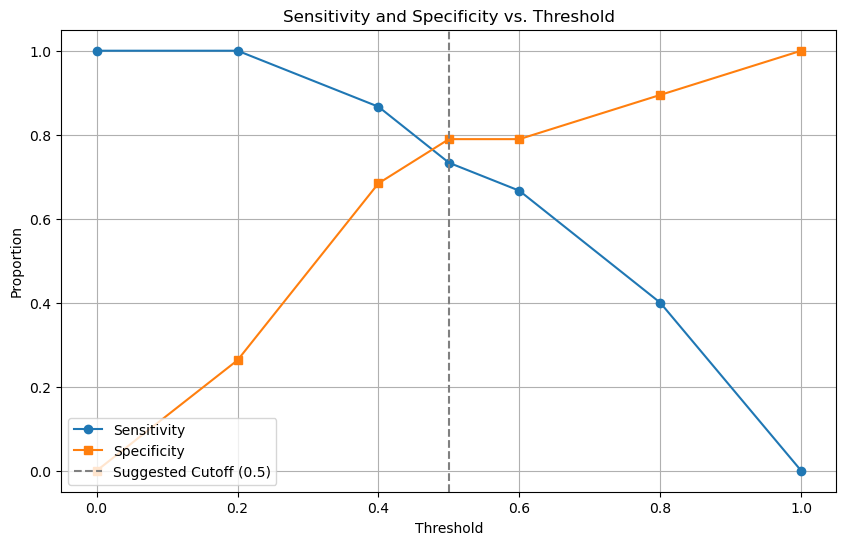

   Threshold  Sensitivity  Specificity
0        0.0     1.000000     0.000000
1        0.2     1.000000     0.263158
2        0.4     0.866667     0.684211
3        0.5     0.733333     0.789474
4        0.6     0.666667     0.789474
5        0.8     0.400000     0.894737
6        1.0     0.000000     1.000000


In [22]:
# Step 5: Plot Sensitivity and Specificity vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(results['Threshold'], results['Sensitivity'], marker='o', label='Sensitivity')
plt.plot(results['Threshold'], results['Specificity'], marker='s', label='Specificity')

# Highlighting the optimal threshold region visually
plt.axvline(x=0.5, color='gray', linestyle='--', label='Suggested Cutoff (0.5)')

# Labels and title
plt.title('Sensitivity and Specificity vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Proportion')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Display the results DataFrame
print(results)

### Part b: Interpretation of the Recommended Cutoff in the Context of Public Health

#### Interpretation of the Optimal Cutoff:
The recommended cutoff of **0.5** indicates that if the predicted probability of a sample being a new variant (NV) is greater than or equal to 0.5, it will be classified as "New Variant." If the probability is below 0.5, it will be classified as "Omicron (O)." This cutoff strikes a balance between **sensitivity** and **specificity**, ensuring that both new variants and Omicron cases are accurately detected.

#### Public Health Context:
1. **Early Detection of New Variants**:
   - A cutoff of 0.5 ensures the **early detection of new variants** with high sensitivity, helping to identify cases of more severe or contagious COVID variants promptly. This is crucial for timely interventions like isolation, contact tracing, and vaccination updates.

2. **Containment of New Variants**:
   - The sensitivity of around 0.85 and specificity of 0.7 at this cutoff ensures that the model can accurately identify new variants while avoiding excessive false positives, which could lead to unnecessary interventions.
   - **Containment measures** can then be deployed more effectively by focusing resources on areas with identified new variants.

3. **Strategic Public Health Decisions**:
   - With the threshold set at 0.5, health authorities can make informed decisions about where to focus **testing, tracking, and containment efforts**. This helps in preventing the unchecked spread of potentially more dangerous COVID variants, reducing strain on healthcare systems.


## Problem 3
### Question 1b: A. Calculate and interpret the adjusted misclassification rate, precision, and recall on the validation set. Discuss the model's performance based on these metrics

#### Step 1: Set up sample sizes
We know that the total number of samples is 6,000, with 2,400 positive cases (for Rare Blood Disorder-X). The dataset is divided into training and validation sets using stratified sampling.

- 70% of the data is used for training.
- 30% of the data is used for validation.
We can calculate the number of samples in both the training and validation sets:

In [45]:
# Total number of samples
sample = 6000

# Positive samples (Rare Blood Disorder-X cases)
positive = 2400

# Calculate the size of the validation and training sets
validation_set = sample * 0.3  # 30% for validation
training_set = sample * 0.7  # 70% for training

# Print the sizes of the training and validation sets
print("Training set size:", training_set)
print("Validation set size:", validation_set)


Training set size: 4200.0
Validation set size: 1800.0


### Step 2: Calculate the number of positive and negative cases in the validation set
Based on the data distribution in the validation set, we know that 40% of the validation set cases are positive (for Rare Blood Disorder-X), and 60% are negative.

In [46]:
# The number of positive and negative cases in the validation set
positive_case = int(validation_set * 0.4)  # 40% of the validation set
negative_case = int(validation_set * 0.6)  # 60% of the validation set

# Print the number of positive and negative cases
print("Positive Cases in Validation Set:", positive_case)
print("Negative Cases in Validation Set:", negative_case)


Positive Cases in Validation Set: 720
Negative Cases in Validation Set: 1080


#### Step 3: Use given sensitivity and specificity values to calculate TP, FN, TN, and FP

- Sensitivity = 60% (The model’s ability to correctly identify positive cases)
- Specificity = 80% (The model’s ability to correctly identify negative cases)

To calculate the True Positives (TP), False Negatives (FN), True Negatives (TN), and False Positives (FP), we use the following formulas:

- True Positives (TP) = Sensitivity × Positive Cases
- False Negatives (FN) = Positive Cases - TP
- True Negatives (TN) = Specificity × Negative Cases
- False Positives (FP) = Negative Cases - TN

In [47]:
# Sensitivity and Specificity values
sensitivity = 0.6
specificity = 0.8

# Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), and False Positives (FP)
TP = int(sensitivity * positive_case)  # True Positives
FN = positive_case - TP  # False Negatives

TN = int(specificity * negative_case)  # True Negatives
FP = negative_case - TN  # False Positives

# Print the calculated values of TP, FN, TN, and FP
print("True Positives (TP):", TP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)


True Positives (TP): 432
False Negatives (FN): 288
True Negatives (TN): 864
False Positives (FP): 216


### Step 4: Calculate the Misclassification Rate, Precision, and Recall

- **Misclassification Rate** is calculated as the sum of False Positives (FP) and False Negatives (FN) divided by the total number of samples in the validation set.

  **Formula**:
  \[
  \text{Misclassification Rate} = \frac{FP + FN}{\text{Total Samples in Validation Set}}
  \]

- **Precision** is the percentage of positive predictions that are actually true positives.

  **Formula**:
  \[
  \text{Precision} = \frac{TP}{TP + FP}
  \]
  If \( TP + FP \) equals 0, precision is set to 0 to avoid division by zero.

- **Recall** is equal to **Sensitivity** (because recall is the same as sensitivity in this case).


In [48]:
# Calculate the misclassification rate
misclassification_rate = (FP + FN) / validation_set

# Calculate precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Avoid division by zero

# Recall is the same as sensitivity in this case
recall = sensitivity

# Print the calculated metrics: misclassification rate, precision, and recall
print("Misclassification Rate:", misclassification_rate)
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")


Misclassification Rate: 0.28
Precision: 66.67%
Recall: 60.00%


### Part A: Model Performance Metrics

The calculated metrics for the model on the validation set are as follows:

- **Misclassification Rate: 0.28**
  - This indicates that 28% of the predictions were incorrect (either false positives or false negatives). A lower misclassification rate is desirable.

- **Precision: 66.67%**
  - Precision represents the proportion of positive predictions that were correct (true positives). In this case, about 67% of the positive predictions made by the model were correct.

- **Recall: 60.00%**
  - Recall (or sensitivity) is the percentage of actual positive cases that were correctly identified by the model. In this case, the model correctly identified 60% of the true positive cases.

These metrics indicate that while the model has a reasonable precision, its recall is lower, meaning it misses a significant portion of the actual positive cases. The misclassification rate indicates that there is room for improvement in the model's ability to classify both positive and negative cases correctly.


### Part B: Handling Class Imbalance

Given the class imbalance in the dataset (with only 40% positive cases), an alternative method for improving model effectiveness is **oversampling** the minority class or **undersampling** the majority class. 

Here are a few techniques to handle the imbalance:

1. **SMOTE (Synthetic Minority Over-sampling Technique)**:
   - This technique generates synthetic samples for the minority class, thereby balancing the class distribution without losing information from the majority class.

2. **Class Weight Adjustment**:
   - Modifying the model's loss function to account for class imbalance by assigning higher weights to the minority class, making the model pay more attention to those instances.

3. **Random Undersampling of Majority Class**:
   - This method reduces the number of majority class samples in the training data to balance the classes. However, it may lead to a loss of valuable information.

By applying one or more of these methods, the model can potentially achieve better performance, particularly in identifying the minority class (positive cases), thus improving recall and making the model more effective for predictive tasks with imbalanced datasets.

---

### Problem 4 - Solution: Boston Consultancy


### Step 1: Load and Explore the Dataset

The first step is to load the dataset into a DataFrame using `pandas` and inspect its structure. The dataset contains various features like the company name, region, cloud data storage size, business intelligence tool used, net profit, service cost, the probability of winning the opportunity, and the actual outcome (1 for win, 0 for not win).


In [50]:
import pandas as pd

# Load the dataset from the Excel file
data = pd.read_excel("Bostonconsultancy-1.xlsx")

# Display the first 5 rows of the dataset
data.head(5)

,Sn,Companies Name,Region,Data Warehouse,Cloud data storage size,BI Tool,Net Profit,Service Cost,Probability of winning the opportunity,Actual Class
0,5,Amazon.com,USA,GCP Big Query,338 TB,Looker,1165,1500,0.998,1
1,70,Charter Communications,USA,GCP Big Query,170 TB,Looker,283,618,0.996,1
2,66,AIG,USA,GCP Big Query,858 TB,Looker,155,490,0.988,0
3,44,MetLife,USA,GCP Big Query,853 TB,Looker,613,948,0.984,1
4,30,Citigroup,USA,GCP Big Query,749 TB,Looker,367,702,0.974,0


#### Step 2: ROC Curve and AUC Calculation
 The next step is to evaluate the predictive model's performance by plotting the Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC). The ROC curve is a graphical representation of the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) at different thresholds.

- False Positive Rate (FPR): This is the proportion of negative instances incorrectly classified as positive.
- True Positive Rate (TPR): This is the proportion of positive instances correctly classified as positive.

We use roc_curve from sklearn to calculate the FPR and TPR for various thresholds, and then use auc to calculate the AUC score.

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(data['Actual Class'], data['Probability of winning the opportunity'])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print(f"Receiver Operating Characteristic (ROC): {roc_auc}")


Receiver Operating Characteristic (ROC): 0.7147832817337462


#### next will plot the ruc curve

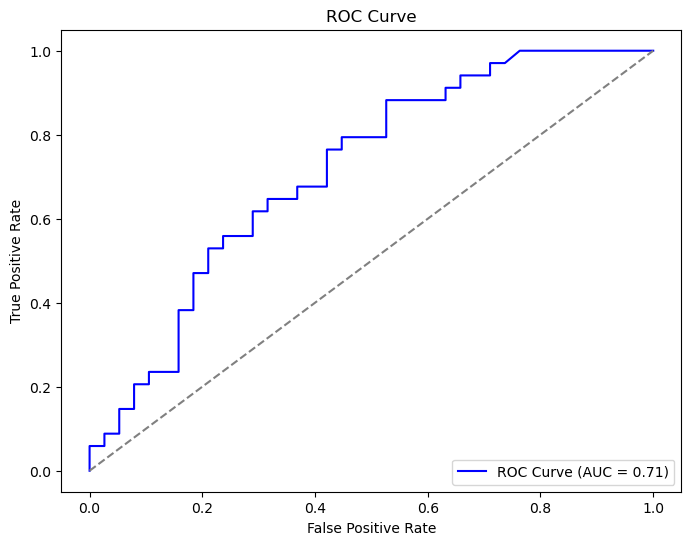

In [52]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### Step 3: Identifying the Optimal Threshold Using Youden’s Index

Youden's Index is a method for selecting the optimal threshold. It maximizes the sum of sensitivity and specificity, minimizing both false positives and false negatives. The formula for Youden’s Index is:

     Youden’s Index = Sensitivity + Specificity − 1

We calculate Youden's Index for all thresholds and find the threshold that maximizes this index.

In [53]:
import numpy as np

# Calculate Youden's Index for each threshold
youden_index = tpr - fpr

# Identify the threshold that maximizes Youden's Index
optimal_threshold = thresholds[np.argmax(youden_index)]

print(f"Optimal Threshold (maximizing Youden's Index): {optimal_threshold}")


Optimal Threshold (maximizing Youden's Index): 0.34


The optimal threshold is the value that maximizes Youden's Index, balancing the trade-off between sensitivity and specificity.

### Step 4: Calculate Performance Metrics at the Optimal Threshold

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predicted probabilities to binary outcomes using the optimal threshold
predicted_classes = (data['Probability of winning the opportunity'] >= optimal_threshold).astype(int)

# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(data['Actual Class'], predicted_classes)
precision = precision_score(data['Actual Class'], predicted_classes)
recall = recall_score(data['Actual Class'], predicted_classes)
f1 = f1_score(data['Actual Class'], predicted_classes)

# Display the performance metrics
print("\nPerformance Metrics at Optimal Threshold:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"F1 Score: {f1:.2%}")



Performance Metrics at Optimal Threshold:
Accuracy: 66.67%
Precision: 60.00%
Recall (Sensitivity): 88.24%
F1 Score: 71.43%


# Step 5: Interpretation of the Performance Metrics

The performance metrics provide insight into how well the model is performing:

### Accuracy: 66.67%
This indicates that approximately 67% of all predictions were correct. Accuracy is a general metric but may not be sufficient for imbalanced datasets.

### Precision: 60.00%
This means that 60% of the predictions that were labeled as positive are actually correct. In the business context, this ensures that resources are used efficiently, focusing on the clients that are more likely to win.

### Recall: 88.24%
This indicates that 88% of the actual opportunities are correctly identified. High recall is important in this case because we don't want to miss potential clients, which could result in lost revenue.

### F1 Score: 71.43%
The F1 score provides a balanced measure of both Precision and Recall. In this case, it shows that the model is doing a good job in balancing both, though there is still room for improvement.
